In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.rename(columns={'Gender':'gender', 'Age':'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'}, inplace=True)

In [5]:
df

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df.isnull().values.any()

False

In [7]:
df.describe()

,CustomerID,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


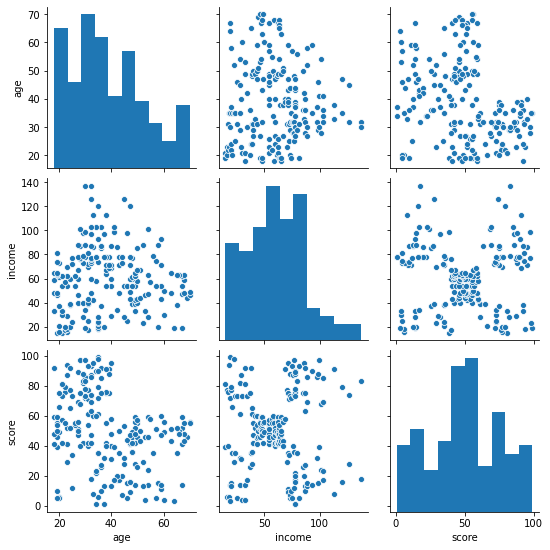

In [8]:
seaborn.pairplot(df[['age','income','score']])

In [9]:
import sklearn.cluster as cluster

In [10]:
kmeans = cluster.KMeans(n_clusters=5)

In [11]:
kmeans = kmeans.fit(df[['score', 'income']])

In [12]:
kmeans.cluster_centers_

array([[82.12820513, 86.53846154],
       [20.91304348, 26.30434783],
       [49.51851852, 55.2962963 ],
       [79.36363636, 25.72727273],
       [17.11428571, 88.2       ]])

In [13]:
df['income_cluster'] = kmeans.labels_

In [14]:
df

,CustomerID,gender,age,income,score,income_cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,1
3,4,Female,23,16,77,3
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,4
197,198,Male,32,126,74,0
198,199,Male,32,137,18,4


In [15]:
df['income_cluster'].value_counts()

2    81
0    39
4    35
1    23
3    22
Name: income_cluster, dtype: int64

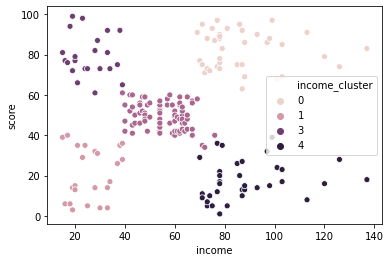

In [16]:
seaborn.scatterplot(x='income', y="score", hue="income_cluster", data=df)

In [17]:
kmeans = cluster.KMeans(n_clusters=2)

In [18]:
kmeans = kmeans.fit(df[['age', 'income']])

In [19]:
kmeans.cluster_centers_

array([[35.12631579, 82.42105263],
       [42.21904762, 40.78095238]])

In [20]:
df['age_cluster'] = kmeans.labels_

In [21]:
df

,CustomerID,gender,age,income,score,income_cluster,age_cluster
0,1,Male,19,15,39,1,1
1,2,Male,21,15,81,3,1
2,3,Female,20,16,6,1,1
3,4,Female,23,16,77,3,1
4,5,Female,31,17,40,1,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,0
196,197,Female,45,126,28,4,0
197,198,Male,32,126,74,0,0
198,199,Male,32,137,18,4,0


In [22]:
df['age_cluster'].value_counts()

1    105
0     95
Name: age_cluster, dtype: int64

In [23]:
df

,CustomerID,gender,age,income,score,income_cluster,age_cluster
0,1,Male,19,15,39,1,1
1,2,Male,21,15,81,3,1
2,3,Female,20,16,6,1,1
3,4,Female,23,16,77,3,1
4,5,Female,31,17,40,1,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,0
196,197,Female,45,126,28,4,0
197,198,Male,32,126,74,0,0
198,199,Male,32,137,18,4,0


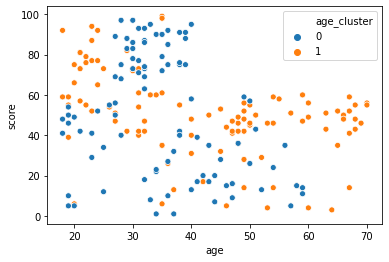

In [24]:
seaborn.scatterplot(x='age', y="score", hue="age_cluster", data=df)

In [31]:
from sklearn.cluster import KMeans

In [32]:
k_range = range(1, 12)
wcss = []

In [33]:
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['income', 'score']])
    wcss.append(km.inertia_)
    

In [34]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37239.83554245604,
 31600.20911534003,
 25012.917069885472,
 21829.135638779822,
 19811.043285792217,
 17577.687828862057]

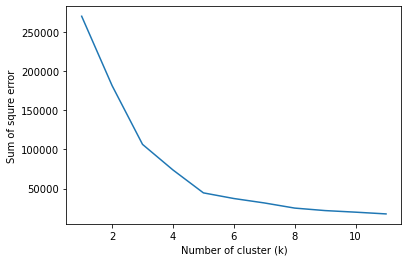

In [36]:
plt.xlabel("Number of cluster (k)")
plt.ylabel("Sum of squre error")
plt.plot(k_range, wcss )